# Weather reading
---

In [60]:
# Data frames.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Set the style of the plots.
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['figure.dpi'] = 300

In [61]:
# Import the data.

df = pd.read_csv('https://raw.githubusercontent.com/atacanbt/programming_for_data_analytics/refs/heads/main/assignments/data/weather_reading_1.csv')

In [62]:
# Read the first and last 5 rows of the data.

df.head(5)

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


In [63]:
# Dataset information.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

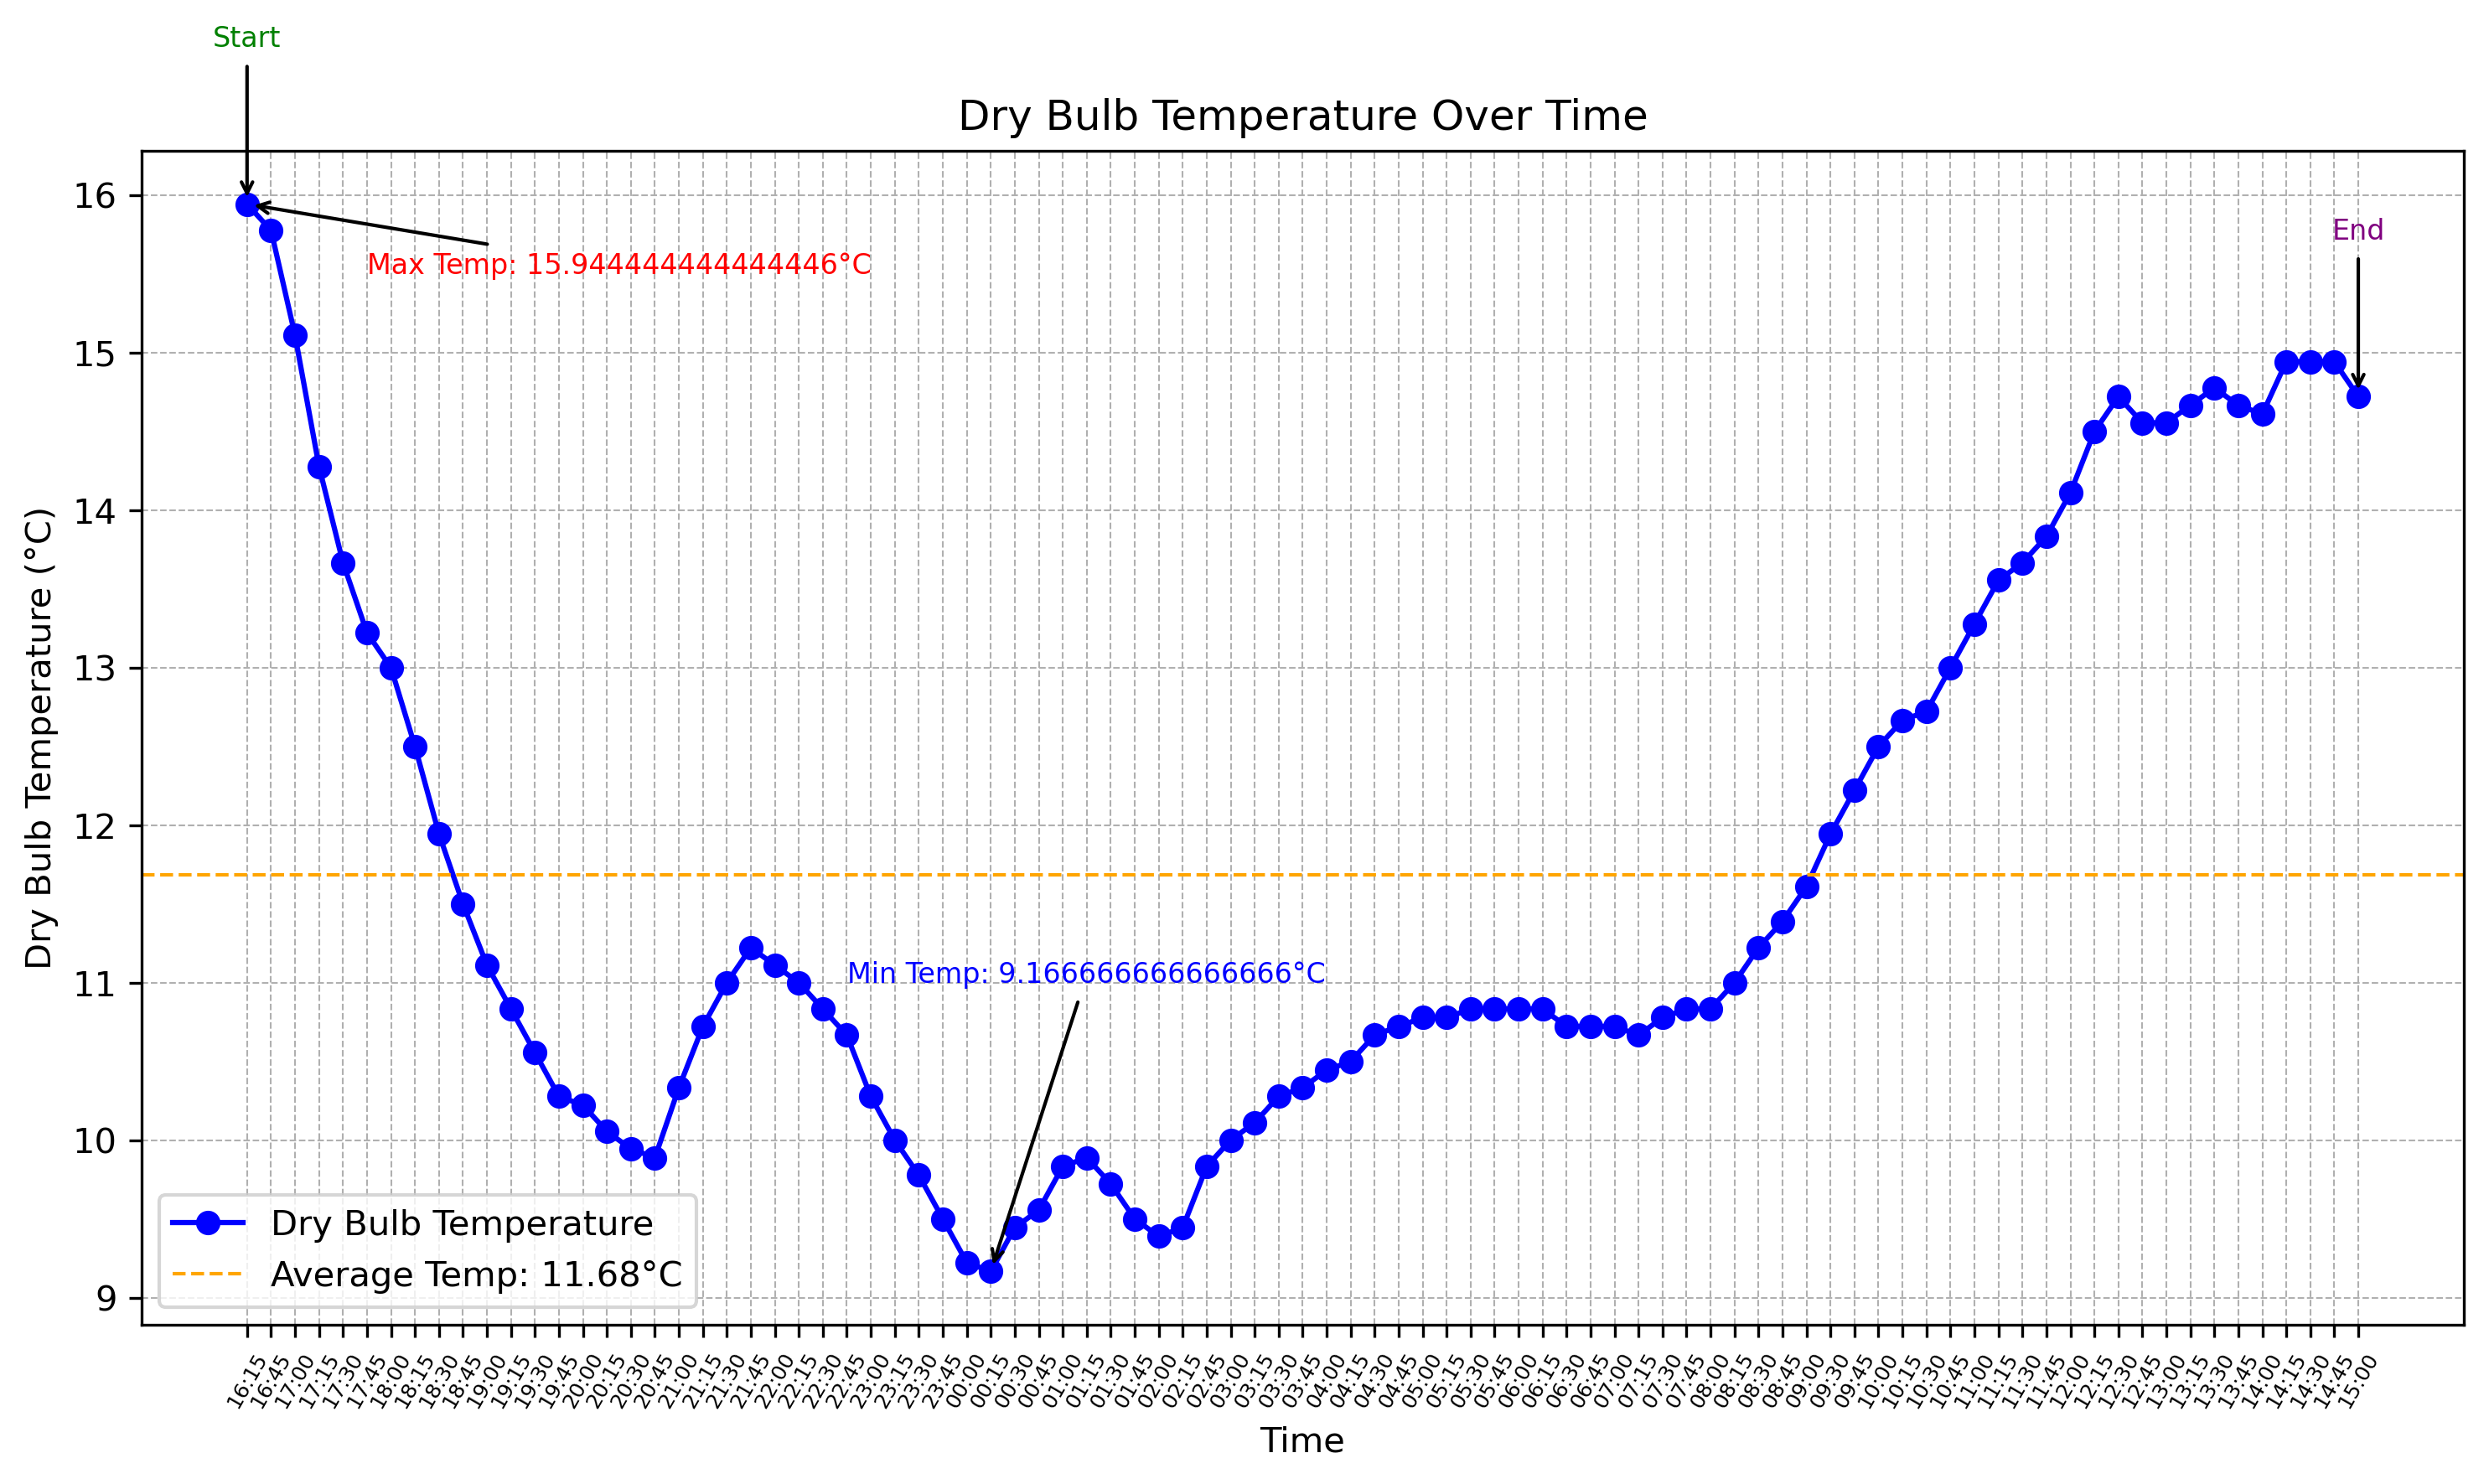

In [95]:
df['reportStartDateTime'] = pd.to_datetime(df['reportStartDateTime'])
df['time'] = df['reportStartDateTime'].dt.strftime('%H:%M')


# Plot the data.
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['dryBulbTemperature_Celsius'], marker='o', linestyle='-', label='Dry Bulb Temperature', color='blue', linewidth=1.5)
plt.ylabel('Dry Bulb Temperature (°C)')
plt.xlabel('Time')
plt.title('Dry Bulb Temperature Over Time')
plt.legend()
plt.xticks(rotation=60, size=6)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Annotations
# 1. Highlight the maximum temperature
max_temp = df['dryBulbTemperature_Celsius'].max()
max_time = df['time'][df['dryBulbTemperature_Celsius'].idxmax()]
plt.annotate(f'Max Temp: {max_temp}°C',
             xy=(max_time, max_temp), 
             xytext=(15.5, 15.5),
             arrowprops=dict(facecolor='red', arrowstyle="->"),
             ha='center', fontsize=8, color='red')

# 2. Highlight the minimum temperature
min_temp = df['dryBulbTemperature_Celsius'].min()
min_time = df['time'][df['dryBulbTemperature_Celsius'].idxmin()]
plt.annotate(f'Min Temp: {min_temp}°C',
             xy=(min_time, min_temp), 
             xytext=(35, 11),
             arrowprops=dict(facecolor='blue', arrowstyle="->"),
             ha='center', fontsize=8, color='blue')

# 3. Annotate start and end points
start_time = df['time'].iloc[0]
start_temp = df['dryBulbTemperature_Celsius'].iloc[0]
plt.annotate('Start', xy=(start_time, start_temp), xytext=(start_time, start_temp + 1),
             arrowprops=dict(facecolor='green', arrowstyle="->"), ha='center', fontsize=8, color='green')

end_time = df['time'].iloc[-1]
end_temp = df['dryBulbTemperature_Celsius'].iloc[-1]
plt.annotate('End', xy=(end_time, end_temp), xytext=(end_time, end_temp + 1),
             arrowprops=dict(facecolor='purple', arrowstyle="->"), ha='center', fontsize=8, color='purple')

# 4. Add a horizontal line for the average temperature
avg_temp = df['dryBulbTemperature_Celsius'].mean()
plt.axhline(y=avg_temp, color='orange', linestyle='--', linewidth=1, label=f'Average Temp: {avg_temp:.2f}°C')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()